In [2]:
import os

print(os.path.abspath(os.curdir))

c:\Users\c23126780\OneDrive - Cardiff University\Documents\DroMoLog\notebooks


In [3]:
import os
os.chdir("..")

In [4]:
print(os.path.abspath(os.curdir))

c:\Users\c23126780\OneDrive - Cardiff University\Documents\DroMoLog


## Filtered Dataset

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

pred_df = pd.read_excel('../../Bahan/best_model_backup/multitask_15/prediction.xlsx')

#### Multitask FPR

In [20]:
import pandas as pd

label2idx = {
    'normal': 0,
    'low': 1,
    'medium': 2,
    'high': 3
}
multitask_df = pd.read_excel('../Bahan/best_model_backup/multitask_15/prediction.xlsx')
multitask_df = multitask_df[multitask_df['verdict'] == False]
multitask_df['label_idx'] = multitask_df['label'].map(label2idx)
multitask_df['pred_idx'] = multitask_df['pred'].map(label2idx)
multitask_df['miss_diff'] = multitask_df['label_idx'] - multitask_df['pred_idx']
multitask_df

,message,label,pred,verdict,prob,prob_high,prob_low,prob_medium,prob_normal,label_idx,pred_idx,miss_diff
9,Forward vision sensor error. Contact DJI Suppo...,medium,high,False,0.973974,0.973974,0.431409,0.992363,0.080341,2,3,-1
14,GPS signal weak. Hovering unstable. Fly with c...,low,medium,False,0.945633,0.013704,0.998347,0.945633,0.376834,1,2,-1
25,A passenger aircraft is approaching. Descend a...,high,low,False,0.984146,0.035734,0.984146,0.112571,0.989590,3,1,2
30,Error: Course angle control error. Please ensu...,high,low,False,0.988470,0.019941,0.988470,0.016184,0.997380,3,1,2
36,Mobile device version too old to support HD im...,low,medium,False,0.995459,0.067663,0.992405,0.995459,0.035470,1,2,-1
38,Vision sensor error. Contact DJI Support for a...,medium,high,False,0.990298,0.990298,0.239815,0.987246,0.119512,2,3,-1
39,Another aircraft is nearby. Another aircraft i...,high,low,False,0.991431,0.019762,0.991431,0.040239,0.995268,3,1,2
42,Motor idle. Check whether propellers are insta...,normal,high,False,0.985827,0.985827,0.313971,0.991592,0.091870,0,3,-3
49,Fly with caution and ensure the aircraft remai...,normal,low,False,0.995980,0.014487,0.995980,0.039747,0.995086,0,1,-1
54,Propulsion output has been limited to ensure b...,normal,high,False,0.528164,0.528164,0.877797,0.992856,0.090898,0,3,-3


#### Cross-Entropy FPR

In [21]:
baseline_df = pd.read_excel('../Bahan/best_model_backup/baseline_15/prediction_best_baseline.xlsx')
baseline_df = baseline_df[baseline_df['verdict'] == False]
baseline_df['label_idx'] = baseline_df['label'].map(label2idx)
baseline_df['pred_idx'] = baseline_df['pred'].map(label2idx)
baseline_df['miss_diff'] = baseline_df['label_idx'] - baseline_df['pred_idx']
baseline_df

,message,label,pred,prob,verdict,label_idx,pred_idx,miss_diff
12,Compass Redundancy Switch,normal,low,0.997340,False,0,1,-1
25,A passenger aircraft is approaching. Descend a...,high,low,0.975418,False,3,1,2
30,Error: Course angle control error. Please ensu...,high,low,0.992642,False,3,1,2
36,Mobile device version too old to support HD im...,low,normal,0.996534,False,1,0,1
38,Vision sensor error. Contact DJI Support for a...,medium,low,0.980815,False,2,1,1
39,Another aircraft is nearby. Another aircraft i...,high,low,0.998203,False,3,1,2
42,Motor idle. Check whether propellers are insta...,normal,medium,0.577896,False,0,2,-2
49,Fly with caution and ensure the aircraft remai...,normal,low,0.571746,False,0,1,-1
67,Downward sensor error. Aircraft unstable at lo...,high,low,0.999950,False,3,1,2
71,Aircraft will automatically descend in nnn,medium,normal,0.999933,False,2,0,2


#### Focal FPR

In [22]:
focal_df = pd.read_csv('../Bahan/best_model_backup/focal/prediction.csv')
if 'verdict' not in focal_df.columns:
    focal_df['verdict'] = [label == pred for label, pred in zip(focal_df['label'].to_list(), focal_df['pred'].to_list())]
focal_df = focal_df[focal_df['verdict'] == False]
focal_df['label_idx'] = focal_df['label'].map(label2idx)
focal_df['pred_idx'] = focal_df['pred'].map(label2idx)
focal_df['miss_diff'] = focal_df['label_idx'] - focal_df['pred_idx']
focal_df

,message,label,pred,prob,verdict,label_idx,pred_idx,miss_diff
12,Compass Redundancy Switch,normal,low,0.513263,False,0,1,-1
25,A passenger aircraft is approaching. Descend a...,high,low,0.516292,False,3,1,2
30,Error: Course angle control error. Please ensu...,high,low,0.905679,False,3,1,2
36,Mobile device version too old to support HD im...,low,normal,0.914677,False,1,0,1
38,Vision sensor error. Contact DJI Support for a...,medium,high,0.866994,False,2,3,-1
39,Another aircraft is nearby. Another aircraft i...,high,low,0.815355,False,3,1,2
42,Motor idle. Check whether propellers are insta...,normal,medium,0.532627,False,0,2,-2
49,Fly with caution and ensure the aircraft remai...,normal,medium,0.650998,False,0,2,-2
54,Propulsion output has been limited to ensure b...,normal,medium,0.491280,False,0,2,-2
65,Drag a box around or tap a target on screen. T...,normal,medium,0.553080,False,0,2,-2


#### Plot The Misclassification Type

In [23]:
baseline_fp = baseline_df['miss_diff'].value_counts()
baseline_fp

miss_diff
 1    8
 2    7
-1    3
-2    1
Name: count, dtype: int64

In [24]:
focal_fp = focal_df['miss_diff'].value_counts()
focal_fp

miss_diff
 2    7
 1    5
-1    4
-2    4
Name: count, dtype: int64

In [25]:
multitask_fp = multitask_df['miss_diff'].value_counts()
multitask_fp

miss_diff
-1    9
 2    7
 1    3
-3    2
Name: count, dtype: int64

In [48]:
fp_all = pd.concat([baseline_fp, focal_fp, multitask_fp], axis=1)
fp_all = fp_all.fillna(0)
fp_all.reset_index(inplace=True)
fp_all_ordered = fp_all.sort_values(by='miss_diff', ascending=False)
fp_all_ordered.reset_index(drop=True, inplace=True)
fp_all_ordered

,miss_diff,count,count,count
0,2,7.0,7.0,7.0
1,1,8.0,5.0,3.0
2,-1,3.0,4.0,9.0
3,-2,1.0,4.0,0.0
4,-3,0.0,0.0,2.0


In [38]:
miss_diff = fp_all_ordered.iloc[:, 0]
miss_diff

1    2
0    1
2   -1
3   -2
4   -3
Name: miss_diff, dtype: int64

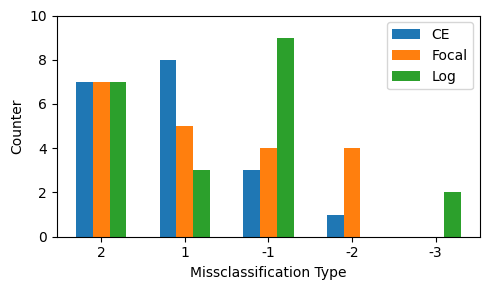

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Missclassification': fp_all_ordered.iloc[:, 0],
    'CE':	fp_all_ordered.iloc[:, 1],
    'Focal':	fp_all_ordered.iloc[:, 2],
    'Log':	fp_all_ordered.iloc[:, 3],
}
false_positive_df = pd.DataFrame(data)
plt.figure(figsize=(5, 3))

# Plotting
bar_width = 0.2
index = false_positive_df.index

plt.bar(index, false_positive_df['CE'], bar_width, label='CE')
plt.bar(index + bar_width, false_positive_df['Focal'], bar_width, label='Focal')
plt.bar(index + bar_width + bar_width, false_positive_df['Log'], bar_width, label='Log')

# Adding labels and title
plt.xlabel('Missclassification Type')
plt.ylabel('Counter')
# plt.title('Accuracy and F1 Score by Batch Size')
plt.xticks(index + bar_width, false_positive_df['Missclassification'])
plt.legend()
plt.ylim(0, 10)
# Show plot
plt.tight_layout()
plt.savefig(os.path.join('visualization', "false_positive_filtered.pdf"), bbox_inches='tight')

plt.show()
plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Missclassification': fp_all_ordered.iloc[:, 0],
    'CE':	fp_all_ordered.iloc[:, 1],
    'Focal':	fp_all_ordered.iloc[:, 2],
    'Log':	fp_all_ordered.iloc[:, 3],
}
false_positive_df = pd.DataFrame(data)
plt.figure(figsize=(5, 3))

# Plotting
bar_width = 0.2
index = false_positive_df.index

plt.bar(index, false_positive_df['CE'], bar_width, label='CE')
plt.bar(index + bar_width, false_positive_df['Focal'], bar_width, label='Focal')
plt.bar(index + bar_width + bar_width, false_positive_df['Log'], bar_width, label='Log')

# Adding labels and title
plt.xlabel('Missclassification Type')
plt.ylabel('Counter')
# plt.title('Accuracy and F1 Score by Batch Size')
plt.xticks(index + bar_width, false_positive_df['Missclassification'])
plt.legend()
plt.ylim(0, 10)
# Show plot
plt.tight_layout()
plt.savefig(os.path.join('visualization', "false_positive_unfiltered.pdf"), bbox_inches='tight')

plt.show()
plt.close()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
# matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 11

# F-BSL F-FCL F-101 F-111 U-BSL U-FCL U-101 U-111
# Create your DataFrame
# data = {
#     'scenario': ['BSL FLT', 'MTL FLT', 'BSL UFL', 'MTL UFL'],
#     'GRU': [80.34188, 82.90598, 95.98214, 96.20536],
#     'LSTM': [82.90598, 82.05128, 95.53571, 95.98214],
#     'Linear': [81.19658, 79.48718, 96.20536, 95.75893],
#     'Transformer': [82.90598, 83.76068, 95.98214, 96.42857]
# }
data = {
'scenario': ['F-BSL', 'F-FCL', 'F-101', 'F-111', 'U-BSL', 'U-FCL', 'U-101', 'U-111'],
'GRU':	[79.487,	80.342,	81.197,	82.906,	95.536,	95.982,	95.982,	96.205],
'Linear':	[80.342,	81.197,	79.487,	78.632,	95.536,	95.982,	94.866,	95.759],
'LSTM':	[82.906,	82.051,	82.051,	81.197,	95.313,	95.536,	95.536,	95.982],
'Transformer':	[82.051,	82.051,	82.906,	83.761,	95.982,	95.759,	96.205,	96.429]
}


df = pd.DataFrame(data)

# Reduce the decimals to three decimal places for numeric columns
numeric_columns = ['GRU', 'Linear', 'LSTM', 'Transformer']
df[numeric_columns] = df[numeric_columns].round(3)

# Create the main plot
plt.figure(figsize=(6, 4))
for column in numeric_columns:
    plt.plot(df['scenario'], df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Dataset-Scenario')
plt.ylabel('Accuracy')
# plt.title('Line Plot of Scenario Accuracy (Reduced to 3 Decimals)')
plt.grid(True)
# plt.xticks(rotation = 45)
plt.legend()

# Create an inset plot
axins = inset_axes(plt.gca(), width="45.5%", height="33%", loc='lower right')
for column in numeric_columns:
    axins.plot(df['scenario'], df[column], marker='o', linestyle='-')
# axins.xticks([])
axins.set_xticks([])
axins.set_xlim(3.7, 7.25)  # Adjust these values for the zoomed-in x-axis limits
axins.set_ylim(94.7, 96.7)  # Adjust these values for the zoomed-in y-axis limits
axins.grid(True)
plt.savefig(os.path.join('visualizations', "best_models_accuracy-notime-poster.png"), bbox_inches='tight')
plt.show()
plt.close()

## Unfiltered Dataset

#### Multitask FPR

In [5]:
import pandas as pd

label2idx = {
    'normal': 0,
    'low': 1,
    'medium': 2,
    'high': 3
}
multitask_un_df = pd.read_excel('../Bahan/best_model_backup/multitask_15_un/prediction.xlsx')
multitask_un_df = multitask_un_df[multitask_un_df['verdict'] == False]
multitask_un_df['label_idx'] = multitask_un_df['label'].map(label2idx)
multitask_un_df['pred_idx'] = multitask_un_df['pred'].map(label2idx)
multitask_un_df['miss_diff'] = multitask_un_df['label_idx'] - multitask_un_df['pred_idx']
multitask_un_df

,message,label,pred,verdict,prob,prob_high,prob_low,prob_medium,prob_normal,label_idx,pred_idx,miss_diff
26,Warning: Motor Obstructed,medium,high,False,0.991485,0.991485,0.173943,0.997845,0.002529,2,3,-1
38,Downward vision sensor error. Contact DJI Supp...,high,medium,False,0.884426,0.152740,0.997039,0.884426,0.090270,3,2,1
80,Motor or propeller error. Check the motors and...,medium,high,False,0.620128,0.620128,0.820585,0.694058,0.128936,2,3,-1
187,Another aircraft is nearby. Another aircraft i...,high,low,False,0.999007,0.000849,0.999007,0.023627,0.965293,3,1,2
191,Gyroscope initialization failed. Restart aircraft,medium,low,False,0.996385,0.000545,0.996385,0.001538,0.996978,2,1,1
205,Compass direction is not the same with IMU,medium,low,False,0.993852,0.001847,0.993852,0.001326,0.998176,2,1,1
215,RTK Base Station Data Not Received,normal,low,False,0.998484,0.001393,0.998484,0.000808,0.997888,0,1,-1
269,Propeller Guard Mounted Propeller Guard mounte...,normal,low,False,0.863356,0.001130,0.863356,0.027956,0.949082,0,1,-1
284,A passenger aircraft is approaching. Descend a...,high,low,False,0.940233,0.000142,0.940233,0.012805,0.977799,3,1,2
385,SD card speed low. Change card,low,medium,False,0.997725,0.004121,0.999186,0.997725,0.001002,1,2,-1


#### Cross Entropy

In [8]:
baseline_un_df = pd.read_csv('../Bahan/best_model_backup/baseline_15_un/prediction.csv')
if 'verdict' not in baseline_un_df.columns:
    baseline_un_df['verdict'] = [label == pred for label, pred in zip(baseline_un_df['label'].to_list(), baseline_un_df['pred'].to_list())]
baseline_un_df = baseline_un_df[baseline_un_df['verdict'] == False]
baseline_un_df['label_idx'] = baseline_un_df['label'].map(label2idx)
baseline_un_df['pred_idx'] = baseline_un_df['pred'].map(label2idx)
baseline_un_df['miss_diff'] = baseline_un_df['label_idx'] - baseline_un_df['pred_idx']
baseline_un_df

,message,label,pred,prob,verdict,label_idx,pred_idx,miss_diff
26,Warning: Motor Obstructed,medium,high,0.970522,False,2,3,-1
118,Aircraft takeoff altitude error. Restart aircraft,low,high,0.607217,False,1,3,-2
187,Another aircraft is nearby. Another aircraft i...,high,low,0.913013,False,3,1,2
191,Gyroscope initialization failed. Restart aircraft,medium,low,0.996413,False,2,1,1
205,Compass direction is not the same with IMU,medium,low,0.959730,False,2,1,1
215,RTK Base Station Data Not Received,normal,low,0.826939,False,0,1,-1
269,Propeller Guard Mounted Propeller Guard mounte...,normal,low,0.677889,False,0,1,-1
284,A passenger aircraft is approaching. Descend a...,high,low,0.510102,False,3,1,2
352,Warning: Motor Overloaded. Aircraft will decel...,medium,high,0.939898,False,2,3,-1
364,Max altitude reached (Altitude limit: nnn),low,normal,0.569137,False,1,0,1


#### Focal Loss

In [10]:
focal_un_df = pd.read_csv('../Bahan/best_model_backup/focal_15_un/prediction.csv')
if 'verdict' not in focal_un_df.columns:
    focal_un_df['verdict'] = [label == pred for label, pred in zip(focal_un_df['label'].to_list(), focal_un_df['pred'].to_list())]
focal_un_df = focal_un_df[focal_un_df['verdict'] == False]
focal_un_df['label_idx'] = focal_un_df['label'].map(label2idx)
focal_un_df['pred_idx'] = focal_un_df['pred'].map(label2idx)
focal_un_df['miss_diff'] = focal_un_df['label_idx'] - focal_un_df['pred_idx']
focal_un_df

,message,label,pred,prob,verdict,label_idx,pred_idx,miss_diff
26,Warning: Motor Obstructed,medium,high,0.917778,False,2,3,-1
166,Cannot send ActiveTrack command,medium,low,0.872921,False,2,1,1
187,Another aircraft is nearby. Another aircraft i...,high,low,0.917800,False,3,1,2
191,Gyroscope initialization failed. Restart aircraft,medium,low,0.958793,False,2,1,1
205,Compass direction is not the same with IMU,medium,low,0.970289,False,2,1,1
284,A passenger aircraft is approaching. Descend a...,high,low,0.573559,False,3,1,2
296,Propeller rotating too fast. Wind resistance a...,medium,high,0.821907,False,2,3,-1
341,Aircraft power insufficient. Fly with caution,medium,low,0.945776,False,2,1,1
352,Warning: Motor Overloaded. Aircraft will decel...,medium,high,0.910693,False,2,3,-1
364,Max altitude reached (Altitude limit: nnn),low,normal,0.952237,False,1,0,1


#### Plot the Missclassification Types

In [12]:
baseline_un_fp = baseline_un_df['miss_diff'].value_counts()
focal_un_fp = focal_un_df['miss_diff'].value_counts()
multitask_un_fp = multitask_un_df['miss_diff'].value_counts()

In [13]:
fp_un_all = pd.concat([baseline_un_fp, focal_un_fp, multitask_un_fp], axis=1)
fp_un_all = fp_un_all.fillna(0)
fp_un_all.reset_index(inplace=True)
fp_un_all_ordered = fp_un_all.sort_values(by='miss_diff', ascending=False)
fp_un_all_ordered.reset_index(drop=True, inplace=True)
fp_un_all_ordered

,miss_diff,count,count,count
0,2,2,2,3.0
1,1,4,5,4.0
2,-1,9,8,7.0
3,-2,1,1,0.0


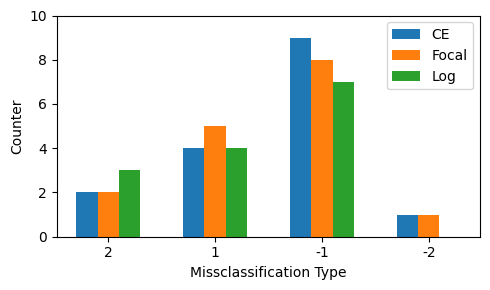

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Missclassification': fp_un_all_ordered.iloc[:, 0],
    'CE':	fp_un_all_ordered.iloc[:, 1],
    'Focal':	fp_un_all_ordered.iloc[:, 2],
    'Log':	fp_un_all_ordered.iloc[:, 3],
}
false_positive_df = pd.DataFrame(data)
plt.figure(figsize=(5, 3))

# Plotting
bar_width = 0.2
index = false_positive_df.index

plt.bar(index, false_positive_df['CE'], bar_width, label='CE')
plt.bar(index + bar_width, false_positive_df['Focal'], bar_width, label='Focal')
plt.bar(index + bar_width + bar_width, false_positive_df['Log'], bar_width, label='Log')

# Adding labels and title
plt.xlabel('Missclassification Type')
plt.ylabel('Counter')
# plt.title('Accuracy and F1 Score by Batch Size')
plt.xticks(index + bar_width, false_positive_df['Missclassification'])
plt.legend()
plt.ylim(0, 10)
# Show plot
plt.tight_layout()
plt.savefig(os.path.join('visualization', "false_positive_unfiltered.pdf"), bbox_inches='tight')

plt.show()
plt.close()